# Guía Completa de Árboles de Decisión: De la Teoría a la Práctica con CART

Este cuaderno es una guía completa sobre los árboles de decisión. Exploraremos los conceptos teóricos fundamentales, los algoritmos más importantes (ID3, C4.5, CART) y las técnicas de ensamblado como Random Forest.

Finalmente, aplicaremos estos conocimientos en un ejemplo práctico utilizando el algoritmo **CART** con la librería `scikit-learn` y los datos proporcionados.


## 1. ¿Qué son los Árboles de Decisión?

Un árbol de decisión es un modelo de aprendizaje supervisado que se asemeja a un diagrama de flujo. Utiliza una estructura de árbol para tomar decisiones basadas en los atributos de los datos, dividiendo el conjunto de datos en subconjuntos cada vez más pequeños y homogéneos.

### Estructura de un Árbol:
*   **Nodo Raíz (Root Node):** El punto de partida que representa todo el conjunto de datos.
*   **Nodos de Decisión (Decision Nodes):** Nodos internos donde se realiza una pregunta sobre un atributo para dividir los datos.
*   **Ramas (Branches):** Conectan los nodos y representan las posibles respuestas a las preguntas.
*   **Hojas (Leaf Nodes):** Nodos terminales que contienen la predicción final (una clase o un valor numérico).

La principal ventaja de los árboles es que son modelos de **"caja blanca"**: su lógica es fácil de visualizar, entender y explicar.



## 2. Algoritmos para la Construcción de Árboles

La diferencia principal entre los algoritmos radica en la métrica que utilizan para decidir cuál es la "mejor" pregunta o división en cada nodo. El objetivo es maximizar la "pureza" de los nodos hijos.

### 2.1. ID3 (Iterative Dichotomiser 3)
*   **Métrica Clave:** **Ganancia de Información (Information Gain)**.
*   **Concepto:** ID3 mide la reducción de la **entropía**. La entropía es una medida del desorden o la incertidumbre en un conjunto de datos. Un conjunto con una sola clase tiene entropía 0 (pureza total), mientras que un conjunto con una mezcla 50/50 de dos clases tiene entropía 1 (máximo desorden).
*   **Funcionamiento:** En cada nodo, ID3 elige el atributo que proporciona la mayor ganancia de información, es decir, el que más reduce la entropía.
*   **Limitaciones:**
    *   Solo maneja atributos categóricos.
    *   Es propenso a preferir atributos con muchos valores distintos.
    *   No tiene un mecanismo de "poda" (pruning), por lo que tiende a crear árboles muy complejos que sobreajustan los datos.

### 2.2. C4.5 (Sucesor de ID3)
*   **Métrica Clave:** **Ratio de Ganancia (Gain Ratio)**.
*   **Concepto:** C4.5 mejora a ID3 al penalizar los atributos con muchos valores. Normaliza la ganancia de información dividiéndola por la "información de división" del atributo.
*   **Ventajas sobre ID3:**
    *   Maneja tanto atributos **categóricos como numéricos** (encuentra el mejor umbral para dividir).
    *   Puede gestionar **valores faltantes** en los datos.
    *   Incluye un proceso de **poda post-entrenamiento** para simplificar el árbol y reducir el sobreajuste.

### 2.3. CART (Classification and Regression Trees)
*   **Métrica Clave:**
    *   **Clasificación:** **Índice de Gini (Gini Impurity)**. Mide la probabilidad de clasificar incorrectamente un elemento si se eligiera su clase al azar según la distribución del nodo. Un Gini de 0 indica pureza total.
    *   **Regresión:** **Error Cuadrático Medio (MSE)**. Busca la división que minimice la varianza en los nodos hijos.
*   **Funcionamiento:** Es el algoritmo más utilizado en la práctica moderna (implementado en `scikit-learn`). Siempre construye **árboles binarios**, donde cada nodo tiene exactamente dos ramas (ej: `edad <= 30` y `edad > 30`).
*   **Ventajas:** Es computacionalmente eficiente y muy versátil, ya que funciona para clasificación y regresión sin modificaciones complejas.


## 3. Más Allá de un Solo Árbol: Random Forest

Un solo árbol de decisión puede ser inestable y propenso al **sobreajuste (overfitting)**: puede aprenderse "de memoria" los datos de entrenamiento y no generalizar bien a datos nuevos. Para solucionar esto, se usan **métodos de ensamblado**.

### Random Forest (Bosques Aleatorios)
*   **Concepto:** En lugar de un solo árbol, Random Forest construye un "bosque" de cientos o miles de árboles de decisión.
*   **Funcionamiento:**
    1.  **Bootstrap Aggregating (Bagging):** Cada árbol se entrena con una muestra aleatoria (con reemplazo) del conjunto de datos original.
    2.  **Aleatoriedad de Atributos:** En cada nodo de cada árbol, solo se considera un subconjunto aleatorio de las características para encontrar la mejor división.
*   **Predicción Final:**
    *   En **clasificación**, la predicción es la clase más votada por todos los árboles del bosque.
    *   En **regresión**, la predicción es el promedio de las predicciones de todos los árboles.
*   **Ventajas:** Es mucho más robusto, preciso y menos propenso al sobreajuste que un solo árbol de decisión.


In [ ]:
# --- Paso 1: Importar librerías y cargar los datos ---

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Transcripción de una muestra representativa de los datos de la imagen
data = "data_base.xlsx"

try:
    df = pd.read_excel(data)
    print("¡Archivo cargado exitosamente!")
    print("Primeras 5 filas:")
    display(df.head())
except FileNotFoundError:
    raise FileNotFoundError(f"Error: No se encontró el archivo '{data}'. Asegúrate de que esté en la misma carpeta que este notebook.")

print("--- Datos Originales (primeras 5 filas) ---")
print(df.head())
print("\n--- Información del DataFrame ---")
df.info()


FileNotFoundError: Error: No se encontró el archivo 'data.xlsx'. Asegúrate de que esté en la misma carpeta que este notebook.

In [ ]:
# --- Paso 2: Preprocesamiento de los Datos ---

# 1. Seleccionar características relevantes y la variable objetivo
# Descartamos NRC, Periodo, Id_Docente que son identificadores o tienen demasiados valores
features = ['Tipo', 'Sede_Docente', 'Tipo_Curso', 'Plantilla', 'Total_Alistamiento']
target = 'Valoracion'

X = df[features]
y = df[target]

# 2. Codificar variables categóricas a números
# Usaremos LabelEncoder para simplicidad. Cada categoría única se convertirá en un número.
encoders = {}
X_encoded = X.copy()

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X[column])
    encoders[column] = le # Guardamos el encoder para referencia futura

print("\n--- Datos Codificados (primeras 5 filas) ---")
print(X_encoded.head())

# 3. Dividir los datos en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y # stratify para mantener la proporción de clases
)

print(f"\nForma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")



--- Datos Codificados (primeras 5 filas) ---
   Tipo  Sede_Docente  Tipo_Curso  Plantilla  Total_Alistamiento
0     0             0           0          1                50.0
1     0             0           0          1                30.0
2     0             0           0          1                20.0
3     1             0           0          1                50.0
4     0             0           0          1                50.0

Forma de X_train: (1012, 5)
Forma de X_test: (254, 5)


¡Modelo CART entrenado con éxito!

--- Reporte de Clasificación en el conjunto de prueba ---
                           precision    recall  f1-score   support

      Desempeño Aceptable       1.00      0.33      0.50         6
          Desempeño Bueno       0.91      1.00      0.95       180
      Desempeño Excelente       1.00      0.67      0.80        42
Desempeño insatisfactorio       1.00      1.00      1.00         6
              No evaluada       1.00      1.00      1.00        20

                 accuracy                           0.93       254
                macro avg       0.98      0.80      0.85       254
             weighted avg       0.94      0.93      0.92       254


--- Matriz de Confusión ---


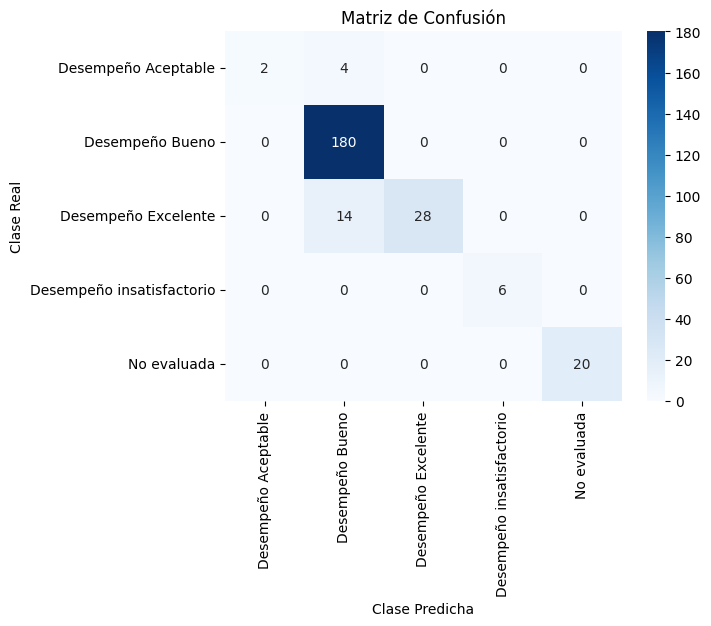

In [ ]:
# --- Paso 3: Entrenar el Árbol de Decisión (CART) ---

# Instanciamos el clasificador. Por defecto, usa 'gini' (CART)
# Usamos max_depth=4 para evitar que el árbol sea demasiado complejo y sobreajuste
cart_classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
cart_classifier.fit(X_train, y_train)

print("¡Modelo CART entrenado con éxito!")


# --- Paso 4: Evaluar el Modelo ---
y_pred = cart_classifier.predict(X_test)

print("\n--- Reporte de Clasificación en el conjunto de prueba ---")
print(classification_report(y_test, y_pred, zero_division=0))

# Visualizar la Matriz de Confusión
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred, labels=cart_classifier.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cart_classifier.classes_, yticklabels=cart_classifier.classes_)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()


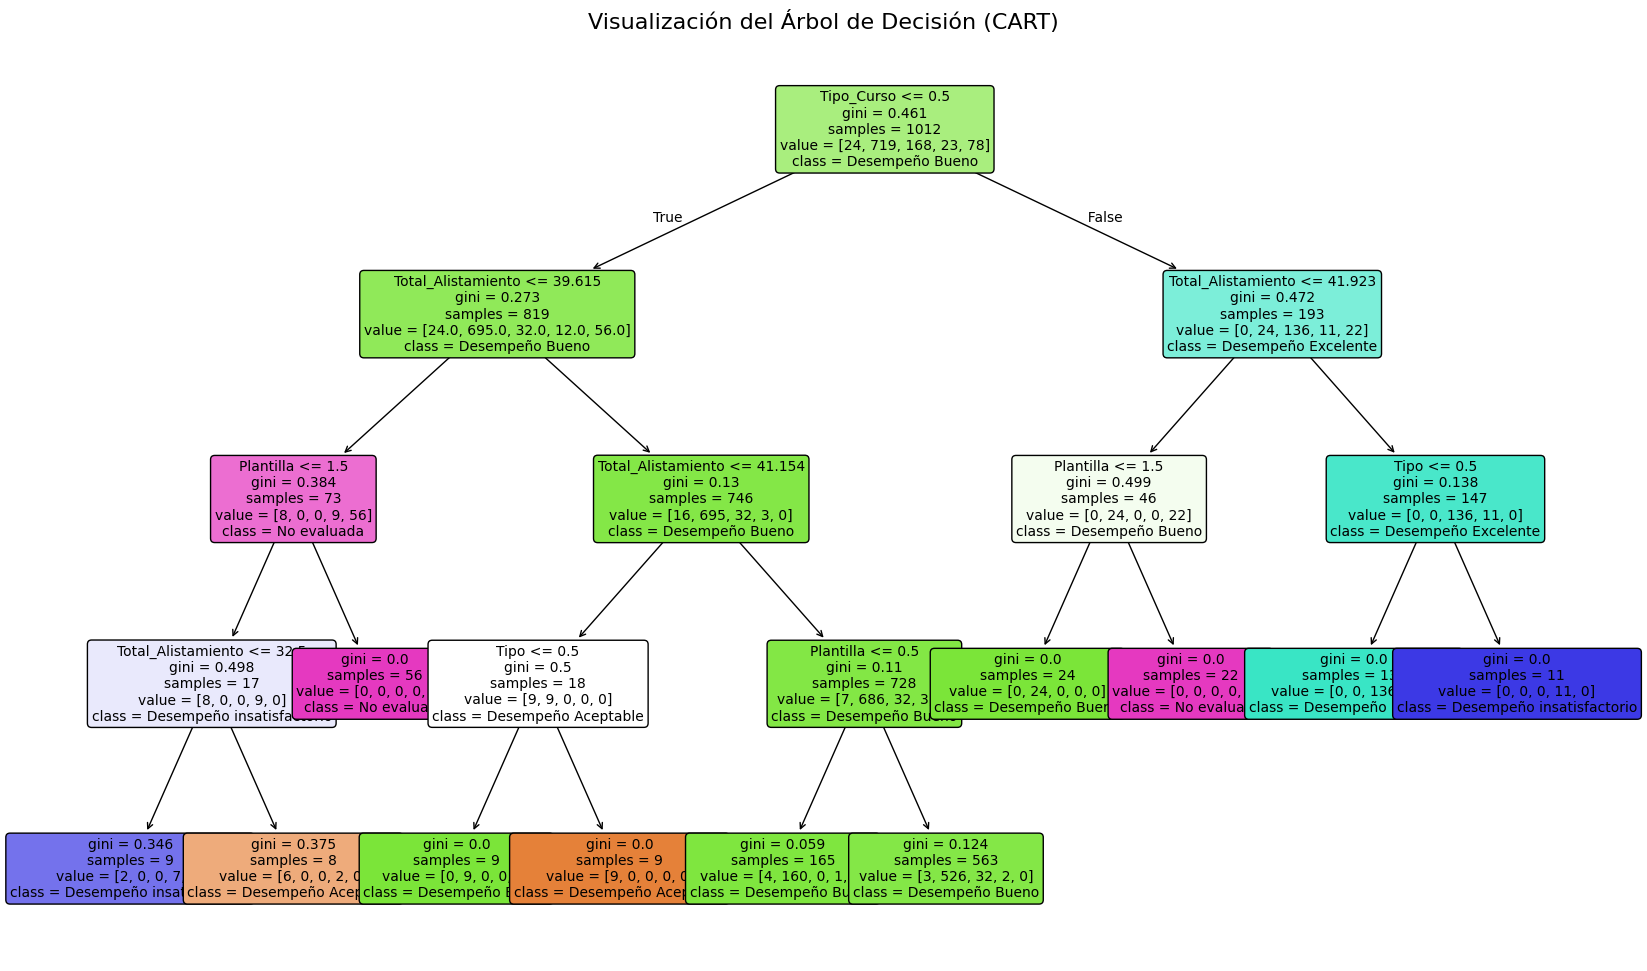

In [ ]:
# --- Paso 5: Visualizar el Árbol de Decisión Entrenado ---

plt.figure(figsize=(20, 12))
plot_tree(
    cart_classifier,
    filled=True, # Colorea los nodos según la pureza
    feature_names=X_encoded.columns, # Nombres de las características
    class_names=cart_classifier.classes_, # Nombres de las clases objetivo
    rounded=True,
    fontsize=10
)
plt.title("Visualización del Árbol de Decisión (CART)", fontsize=16)
plt.show()


## 6. Mejorando el Rendimiento: Random Forest

Como vimos en el análisis anterior, nuestro árbol de decisión único (CART) tenía problemas para distinguir entre las clases "Desempeño Bueno", "Excelente" y "Aceptable", tendiendo a clasificar erróneamente las dos últimas como "Bueno".

Para mejorar esto, usaremos un **Random Forest (Bosque Aleatorio)**. Este es un método de ensamblado que construye múltiples árboles de decisión durante el entrenamiento y emite la clase que es la moda de las clases (clasificación) de los árboles individuales.

**Ventajas clave:**
*   **Mayor Precisión:** Generalmente tiene un mejor rendimiento que un solo árbol.
*   **Más Robusto y Estable:** Es menos propenso al sobreajuste porque promedia los resultados de muchos árboles, reduciendo la varianza.

Vamos a entrenar un clasificador Random Forest con los mismos datos y compararemos los resultados.


Entrenando el modelo Random Forest...
¡Modelo Random Forest entrenado con éxito!

--- Reporte de Clasificación (Random Forest) ---
                           precision    recall  f1-score   support

      Desempeño Aceptable       1.00      0.33      0.50         6
          Desempeño Bueno       0.91      1.00      0.95       180
      Desempeño Excelente       1.00      0.67      0.80        42
Desempeño insatisfactorio       1.00      1.00      1.00         6
              No evaluada       1.00      1.00      1.00        20

                 accuracy                           0.93       254
                macro avg       0.98      0.80      0.85       254
             weighted avg       0.94      0.93      0.92       254


--- Matriz de Confusión (Random Forest) ---


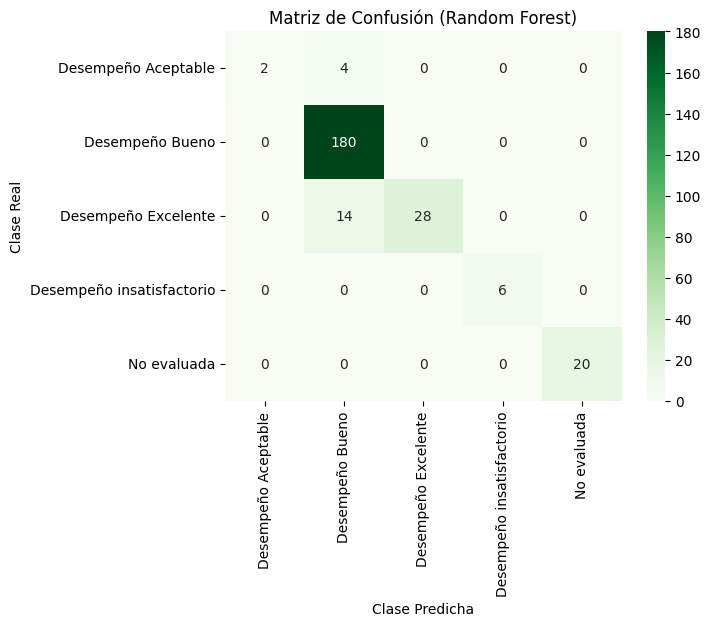

In [ ]:
# --- Paso 6: Entrenar y Evaluar un Clasificador Random Forest ---

from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar el modelo
# n_estimators=100 significa que construiremos un bosque de 100 árboles.
# random_state=42 para asegurar que los resultados sean reproducibles.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# 2. Entrenar el modelo con los mismos datos de entrenamiento
print("Entrenando el modelo Random Forest...")
rf_classifier.fit(X_train, y_train)
print("¡Modelo Random Forest entrenado con éxito!")

# 3. Evaluar el modelo en el conjunto de prueba
y_pred_rf = rf_classifier.predict(X_test)

print("\n--- Reporte de Clasificación (Random Forest) ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# 4. Visualizar la Matriz de Confusión para el Random Forest
print("\n--- Matriz de Confusión (Random Forest) ---")
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_classifier.classes_)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión (Random Forest)')
plt.show()



--- Importancia de las Características según Random Forest ---
              Feature  Importance
2          Tipo_Curso    0.374111
4  Total_Alistamiento    0.359554
3           Plantilla    0.197492
0                Tipo    0.052400
1        Sede_Docente    0.016444


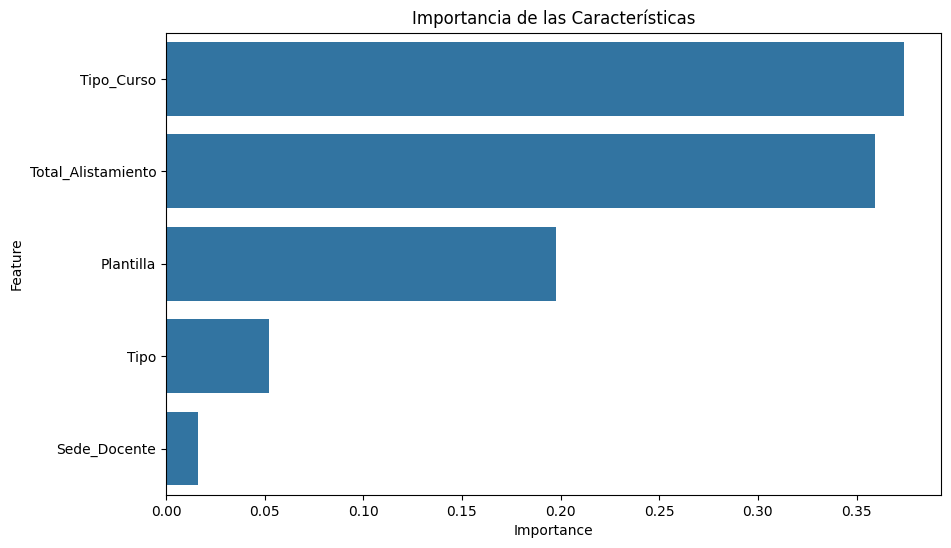

In [ ]:
# --- Paso Opcional pero muy útil: Ver la Importancia de las Características ---
# Random Forest puede decirnos qué características fueron más importantes para tomar las decisiones.

importances = rf_classifier.feature_importances_
feature_names = X_encoded.columns

# Crear un DataFrame para visualizar mejor
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Importancia de las Características según Random Forest ---")
print(feature_importance_df)

# Graficar la importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.show()
